In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler




In [2]:
# Load dataset
df = pd.read_csv('fruit.csv')
df.head()

,label,ph,temperature,humidity,altitude,rainfall,N,P,K
0,Almond,6.43,27.41,50.10,486,582.53,45,47,83
1,Almond,7.11,18.26,53.39,1108,509.42,105,41,69
2,Almond,6.45,29.09,51.00,268,486.98,74,26,90
3,Almond,7.41,17.50,56.40,973,551.17,97,26,70
4,Almond,7.36,16.31,48.97,903,950.01,63,30,113


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        36400 non-null  object 
 1   ph           36400 non-null  float64
 2   temperature  36400 non-null  float64
 3   humidity     36400 non-null  float64
 4   altitude     36400 non-null  int64  
 5   rainfall     36400 non-null  float64
 6   N            36400 non-null  int64  
 7   P            36400 non-null  int64  
 8   K            36400 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.5+ MB


In [4]:
# Check for missing values
df.isnull().sum()

label          0
ph             0
temperature    0
humidity       0
altitude       0
rainfall       0
N              0
P              0
K              0
dtype: int64

In [5]:
df.columns

Index(['label', 'ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N',
       'P', 'K'],
      dtype='object')

In [6]:
df.shape

(36400, 9)

In [7]:
df['label'].unique()

array(['Almond', 'Apple', 'Apricot', 'Avocado', 'Beans', 'Beetroot',
       'Bitter Melon', 'Bottle Gourd', 'Brinjal (Eggplant)', 'Broccoli',
       'Buckwheat', 'Cabbage', 'Capsicum (Bell Pepper)', 'Cardamom',
       'Carrot', 'Cashew', 'Cauliflower', 'Chayote', 'Chestnut',
       'Chia Seed', 'Chillies', 'Cinnamon', 'Clove', 'Coconut', 'Coffee',
       'Corn (Maize)', 'Cotton', 'Cranberries', 'Currants',
       'Custard Apple', 'Date Palm', 'Dragon Fruit', 'Elderberries',
       'Fenugreek (Methi)', 'Ginger', 'Goji Berries', 'Grapes', 'Guava',
       'Hazelnut', 'Hemp', 'Jackfruit', 'Java Plum',
       'Jujube (Chinese Date)', 'Jute', 'Kiwi', 'Kiwifruit', 'Lemons',
       'Lettuce', 'Limes', 'Loquat', 'Lychee', 'Mango', 'Medlar',
       'Millet', 'Moringa (Sitalchini)', 'Mountain Apple (Rose Apple)',
       'Oats', 'Okra', 'Olive', 'Onion', 'Orange', 'Papaya',
       'Passion Fruit', 'Peaches', 'Peanut', 'Peas', 'Pineapple', 'Plums',
       'Pomegranate', 'Pomegranates', 'Potato', 'P

In [8]:
df['label'].value_counts()

label
Almond          400
Pomegranate     400
Pineapple       400
Peas            400
Peanut          400
               ... 
Currants        400
Cranberries     400
Cotton          400
Corn (Maize)    400
Watermelons     400
Name: count, Length: 91, dtype: int64

In [9]:
df.describe()

,ph,temperature,humidity,altitude,rainfall,N,P,K
count,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000,36400.000000
mean,6.424350,23.907199,61.427001,826.576319,987.956883,98.796099,39.552637,115.295440
std,0.584336,5.533070,11.080862,576.625825,509.132993,32.333458,17.690651,83.563262
min,4.000000,10.000000,30.000000,0.000000,65.290000,20.000000,10.000000,20.000000
25%,6.060000,20.350000,53.570000,400.750000,625.955000,80.000000,28.000000,81.000000
50%,6.430000,23.950000,61.965000,762.500000,787.795000,96.000000,36.000000,99.000000
75%,6.830000,28.050000,69.430000,1139.000000,1245.987500,115.000000,45.000000,119.000000
max,8.490000,35.970000,89.960000,4000.000000,2993.110000,250.000000,140.000000,1185.000000


Statistical plots for: ph


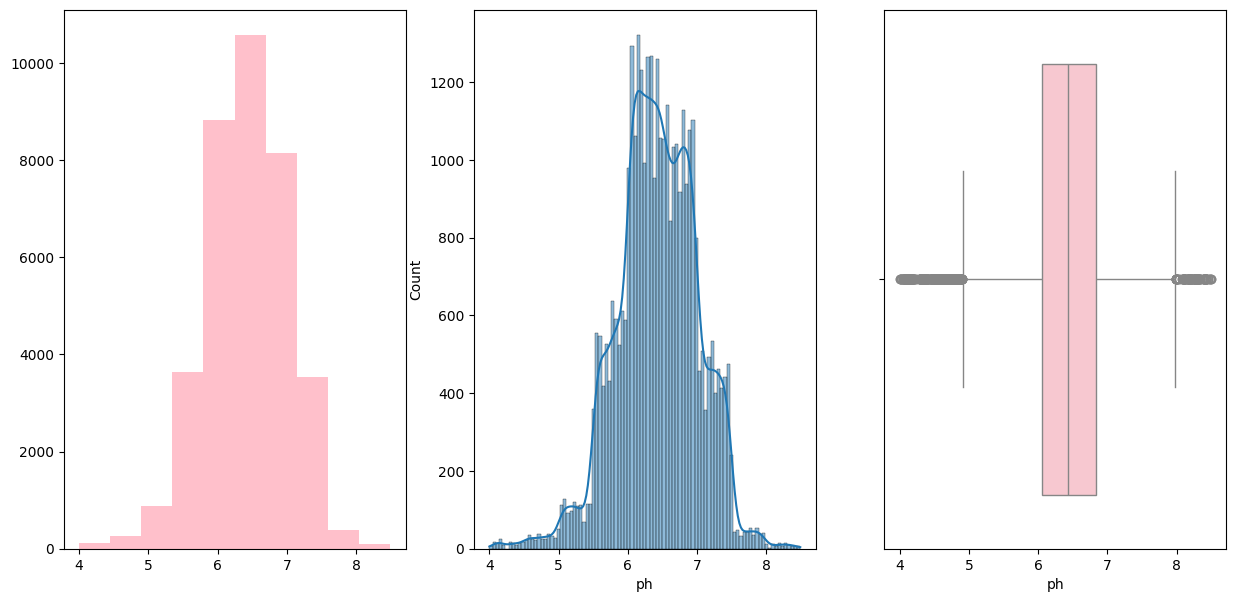

------------------------------------------------------------
Statistical plots for: temperature


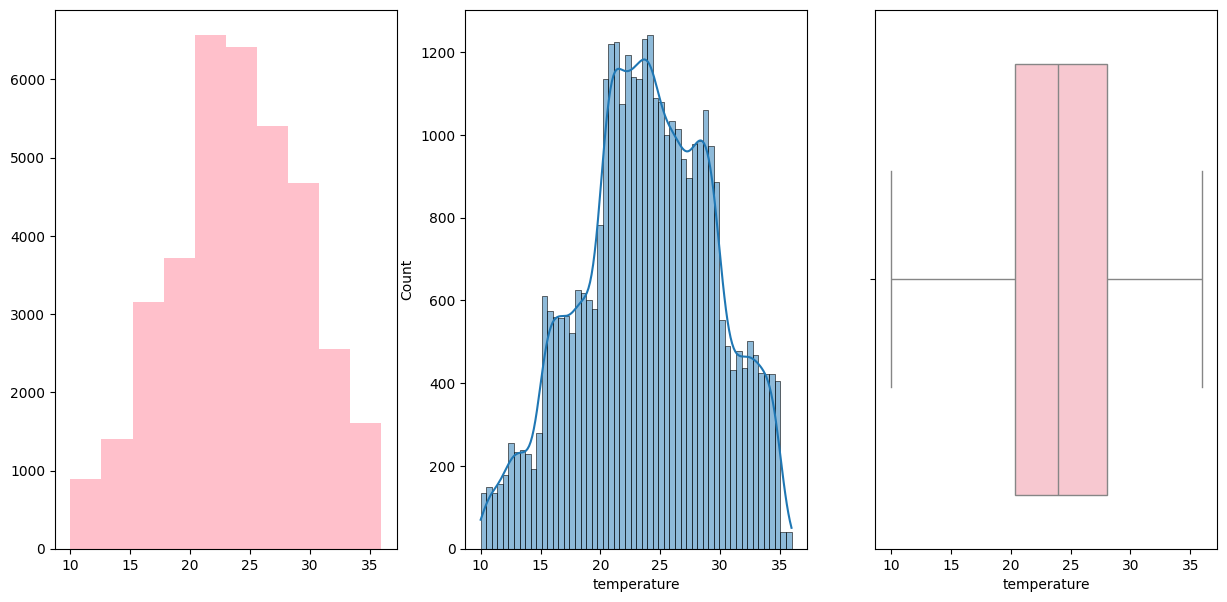

------------------------------------------------------------
Statistical plots for: humidity


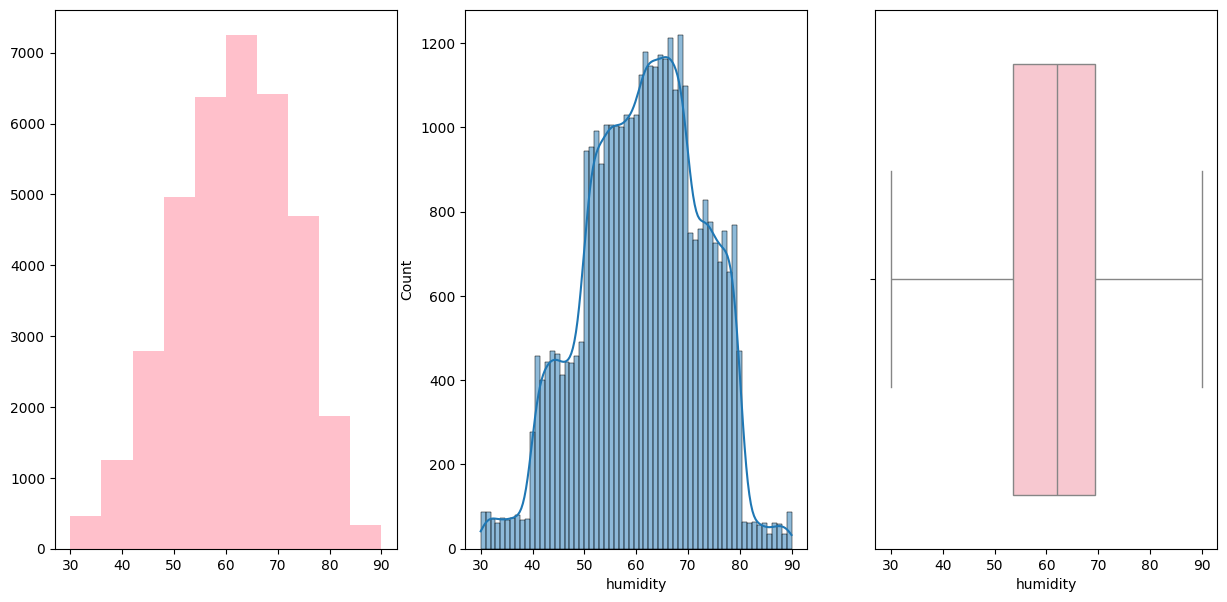

------------------------------------------------------------
Statistical plots for: altitude


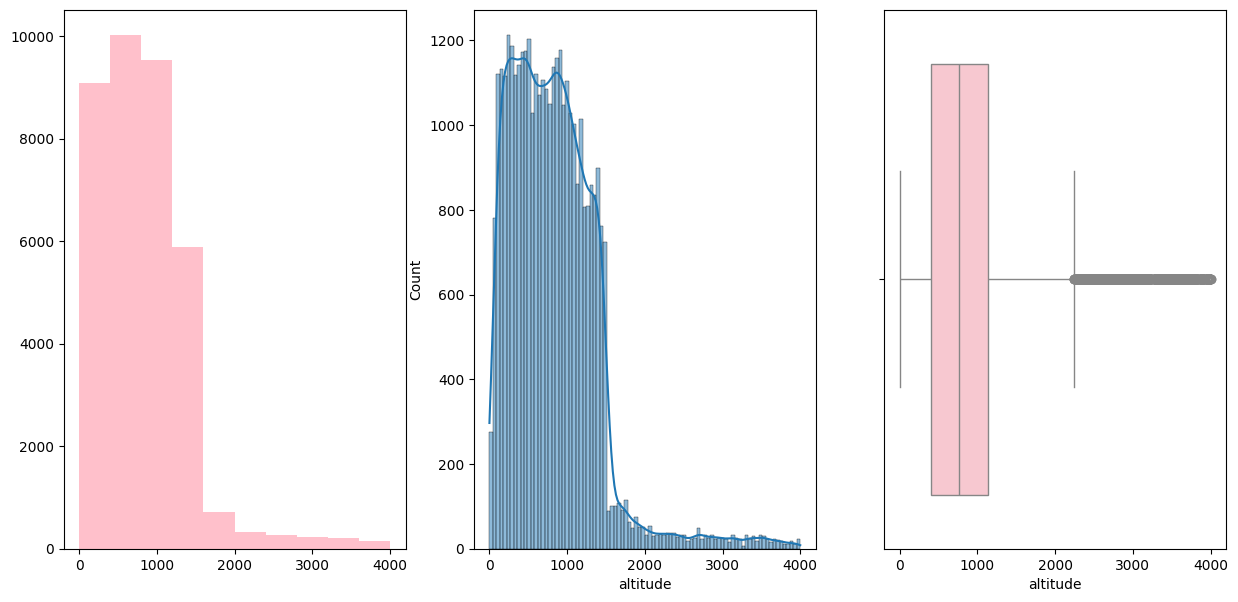

------------------------------------------------------------
Statistical plots for: rainfall


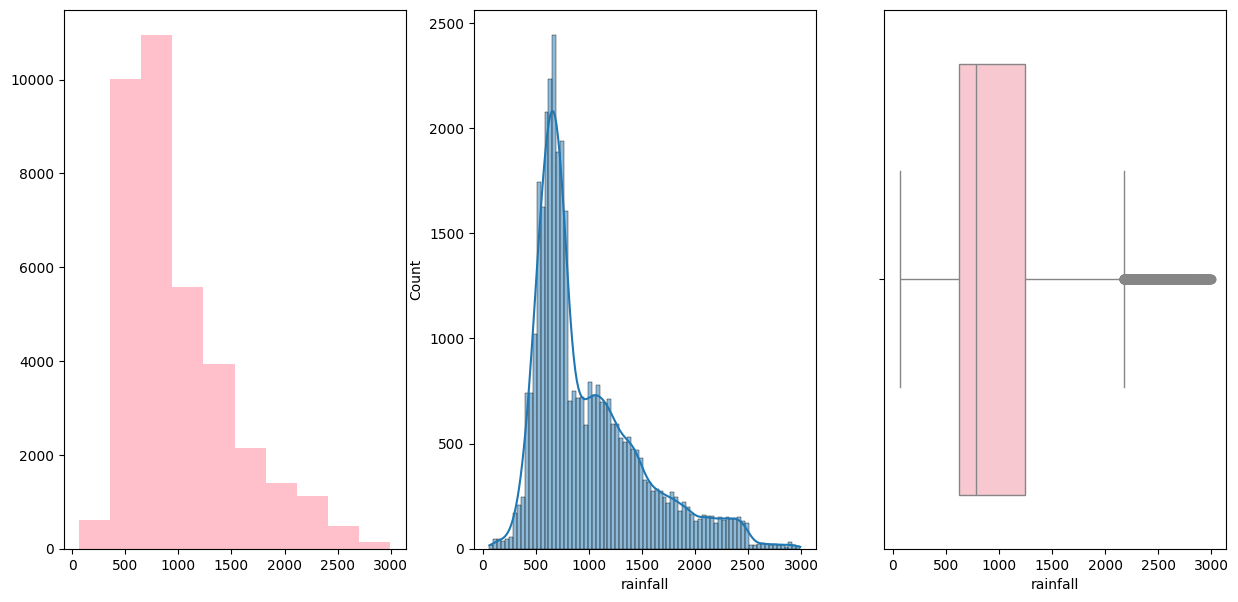

------------------------------------------------------------
Statistical plots for: N


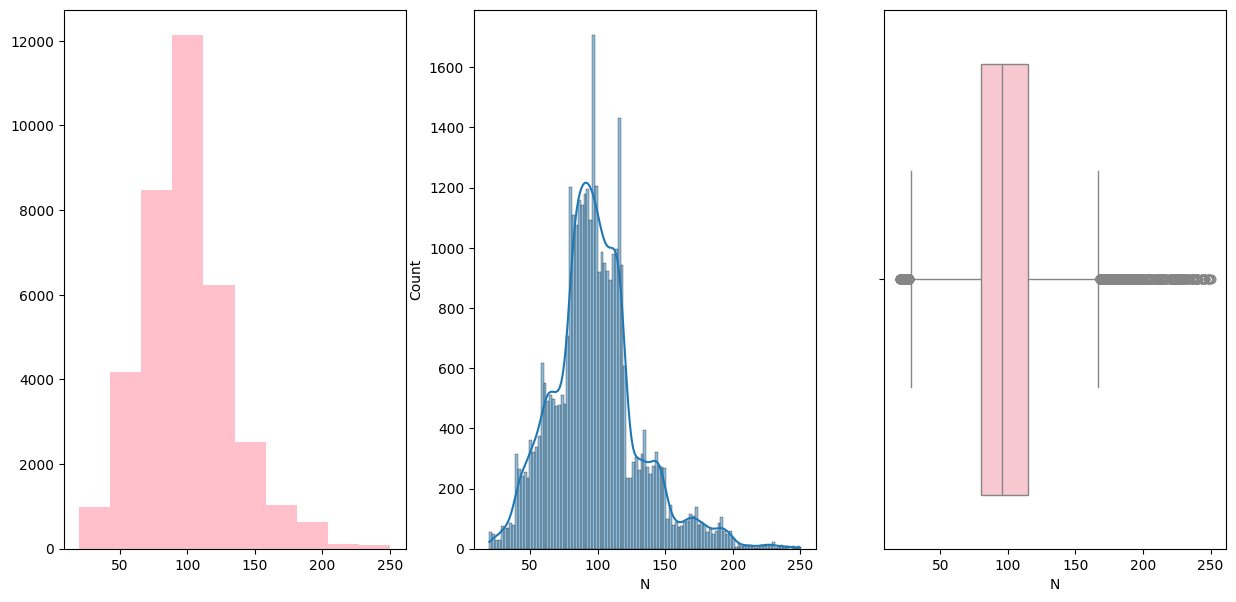

------------------------------------------------------------
Statistical plots for: P


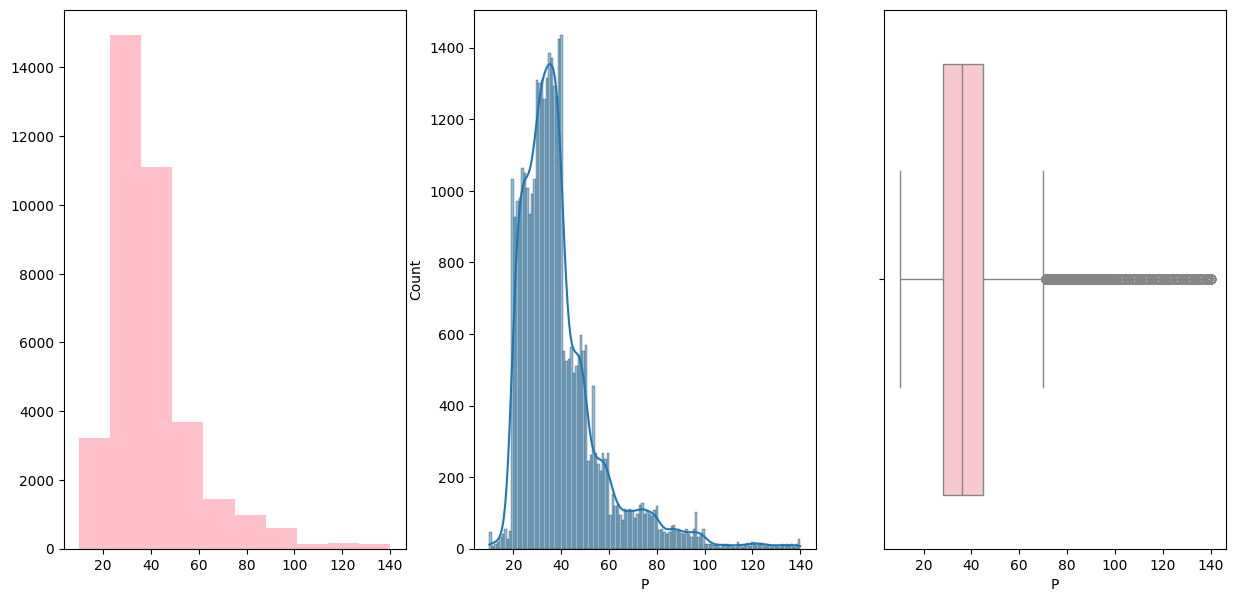

------------------------------------------------------------


In [10]:
# Visualize data distribution and characteristics
def visualize(df, col):
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color='pink')

    plt.subplot(1, 3, 2)
    sns.histplot(df[col], kde=True)

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[col], color='pink')

    plt.show()

for col in df.columns[:-1]:  
    if col != 'label':
        print(f'Statistical plots for: {col}')
        visualize(df, col)
        print("-" * 60)


<Axes: xlabel='label', ylabel='count'>

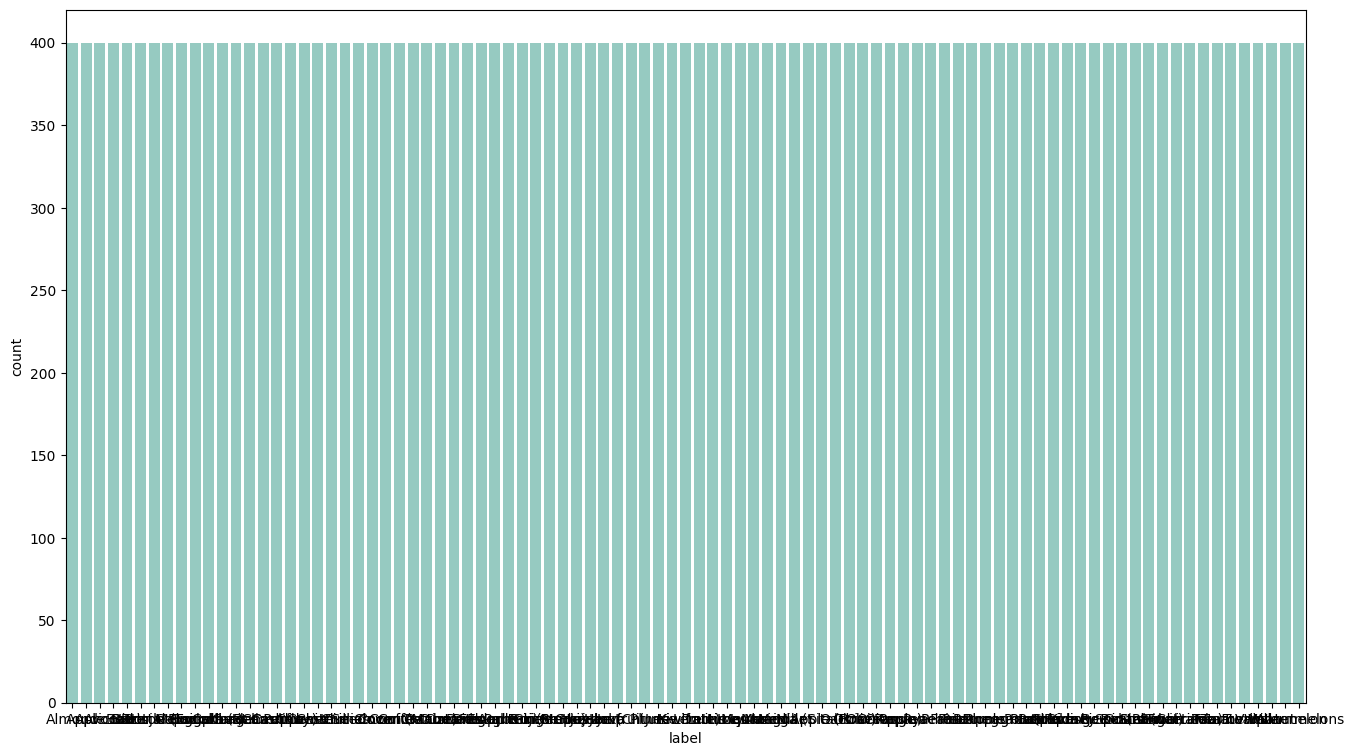

In [11]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [12]:
df.shape

(36400, 9)

In [13]:
def handle_outliers_per_label(df, column):
    unique_labels = df['label'].unique()
    for label in unique_labels:
        label_data = df[df['label'] == label][column]
        q1 = label_data.quantile(0.25)
        q3 = label_data.quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        df.loc[(df['label'] == label) & ((df[column] > upper_limit) | (df[column] < lower_limit)), column] = np.NaN

columns_to_handle_outliers = ['ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N', 'P', 'K']
for col in columns_to_handle_outliers:
    handle_outliers_per_label(df, col)

df.dropna(inplace=True)


In [14]:
df.shape

(36400, 9)

In [15]:
df['label'].value_counts()

label
Almond          400
Pomegranate     400
Pineapple       400
Peas            400
Peanut          400
               ... 
Currants        400
Cranberries     400
Cotton          400
Corn (Maize)    400
Watermelons     400
Name: count, Length: 91, dtype: int64

<Axes: xlabel='label', ylabel='count'>

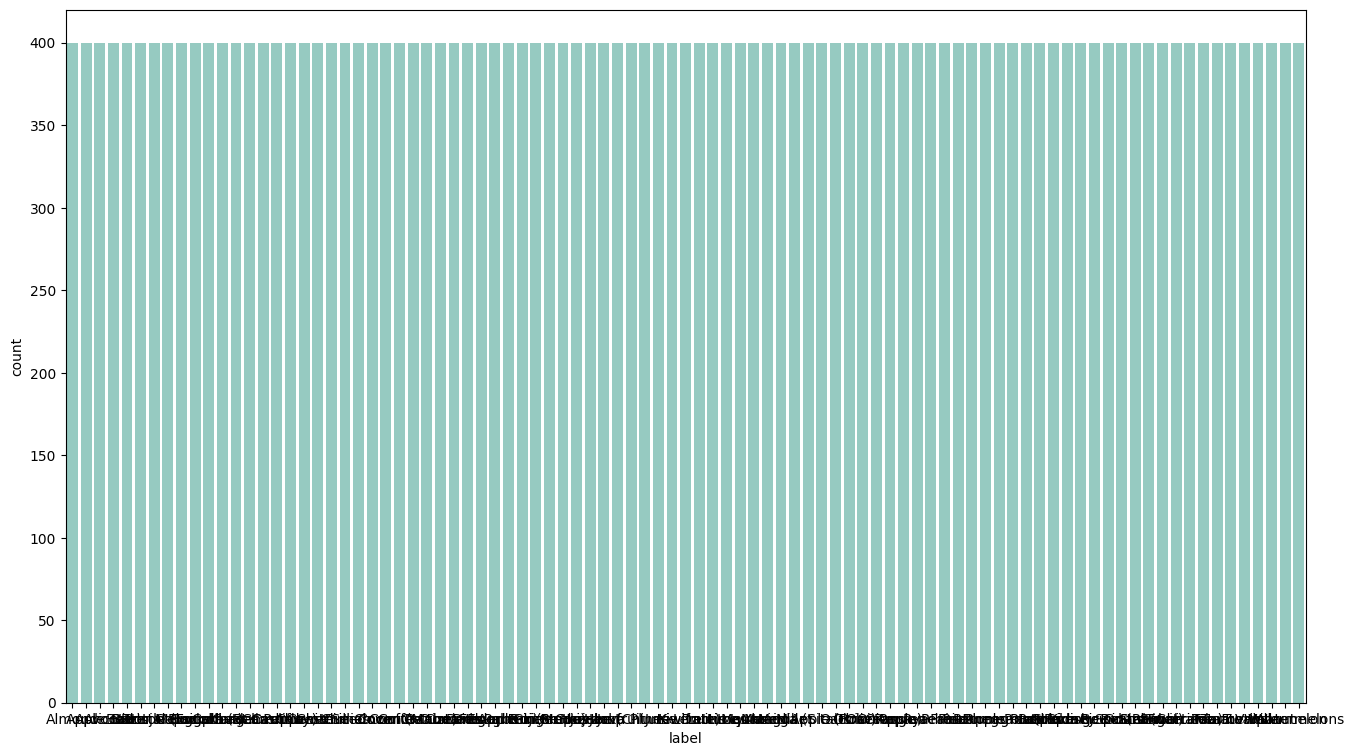

In [16]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(df.drop('label', axis=1), df['label'])

balanced_df = pd.DataFrame(X_resampled, columns=df.drop('label', axis=1).columns)
balanced_df['label'] = y_resampled

#balanced_df.to_csv('new_dataset.csv', index=False)


In [19]:
balanced_df['label'].value_counts()

label
Almond          400
Pomegranate     400
Pineapple       400
Peas            400
Peanut          400
               ... 
Currants        400
Cranberries     400
Cotton          400
Corn (Maize)    400
Watermelons     400
Name: count, Length: 91, dtype: int64

In [20]:
balanced_df.shape

(36400, 9)

In [21]:
import pandas as pd
import random

num_samples_per_label = 400

unique_labels = balanced_df['label'].unique()

new_data = []

# Iterate through each unique label
for label in unique_labels:

    subset = balanced_df[balanced_df['label'] == label]
    
    for _ in range(num_samples_per_label):
        sampled_row = {'label': label}
        for param in balanced_df.columns:
            if param != 'label': 
                sampled_row[param] = random.choice(subset[param].values)
        new_data.append(sampled_row)

new_dataset = pd.DataFrame(new_data)

print(new_dataset)

combined_dataset = pd.concat([balanced_df, new_dataset], axis=0)

combined_dataset.reset_index(drop=True, inplace=True)

combined_dataset.to_csv('fruit.csv', index=False)

print("Combined dataset saved to 'fruits.csv'")


             label    ph  temperature  humidity  altitude  rainfall      N  \
0           Almond  6.78        21.32     48.81    1305.0    426.91   43.0   
1           Almond  7.28        19.05     56.15     135.0    866.16   56.0   
2           Almond  6.24        20.12     40.53     450.0    552.77   50.0   
3           Almond  6.04        28.03     67.03     486.0    786.64   60.0   
4           Almond  7.20        19.05     55.11     796.0    565.52  103.0   
...            ...   ...          ...       ...       ...       ...    ...   
36395  Watermelons  7.24        32.23     69.64     503.0   1370.90   91.0   
36396  Watermelons  6.54        30.43     51.14     529.0   1018.07   89.0   
36397  Watermelons  6.54        32.00     65.99     527.0   1483.10  137.0   
36398  Watermelons  6.82        32.09     58.46     296.0   1415.50  140.0   
36399  Watermelons  7.20        25.90     69.98     828.0   1340.12  122.0   

          P      K  
0      37.0   55.0  
1      56.0   86.0  


In [22]:
import pandas as pd
import numpy as np
import random

min_modification_ratio = 0.2  
max_modification_ratio = 0.8  

range_value = 5

ok_data = []

for label in combined_dataset['label'].unique():
    # Generating a random modification ratio for the current label
    modification_ratio = random.uniform(min_modification_ratio, max_modification_ratio)
    
    # Filter the dataset for the current label
    subset = combined_dataset[combined_dataset['label'] == label]
    
    # Get the minimum and maximum values of each parameter for the current label
    min_values = subset.drop('label', axis=1).min()
    max_values = subset.drop('label', axis=1).max()
    
    # Iterate through each row of the subset
    for index, row in subset.iterrows():
        # Initialize a dictionary to store modified values for the current row
        modified_row = {'label': label}
        
        # Iterate through each parameter within the subset
        for param in subset.columns[subset.columns != 'label']:
            # Convert the value to numeric if it's not already
            original_value = pd.to_numeric(row[param], errors='coerce')
            
            # If the original value is NaN or non-numeric, skip modification for this parameter
            if np.isnan(original_value):
                modified_row[param] = row[param]  # Insert original data
                continue
            
            # Check if the parameter should be modified based on the modification ratio
            if random.random() <= modification_ratio:
                # Generate a random value within the specified range (-5 to +5)
                random_value = random.uniform(-range_value, range_value)
                
                # Add or subtract the random value to the original parameter value
                modified_value = original_value + random_value
                
                # Ensure the modified value does not exceed the maximum or fall below the minimum
                modified_value = min(max_values[param], max(min_values[param], modified_value))
                
                # Round the modified value to two decimal places
                modified_value = round(modified_value, 2)
                
                # Update the value in the modified row dictionary
                modified_row[param] = modified_value
            else:
                modified_row[param] = row[param]  # Insert original data
        
        # Append the modified row to the ok_data list
        ok_data.append(modified_row)

ok_dataset = pd.DataFrame(ok_data)

combined_dataset = pd.concat([combined_dataset, ok_dataset], ignore_index=True)

combined_dataset.to_csv('combined_fruits.csv', index=False)

print("Combined dataset saved to 'combined_fruits.csv'")


Combined dataset saved to 'combined_fruits.csv'
